# **Customer Segmentation/Clustering**

# **Data Preparation**

In [1]:
import pandas as pd


In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Merge datasets
customer_data = transactions.merge(customers, on="CustomerID")

In [4]:
# Create customer-level features
customer_features = customer_data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "TransactionID": "count",
    "Region": lambda x: x.mode()[0]  # Most frequent region
}).reset_index()

customer_features.rename(columns={
    "TotalValue": "TotalTransactionValue",
    "Quantity": "TotalQuantity",
    "TransactionID": "TransactionCount",
    "Region": "PreferredRegion"
}, inplace=True)

print("Customer-level features prepared:")
print(customer_features.head())

Customer-level features prepared:
  CustomerID  TotalTransactionValue  TotalQuantity  TransactionCount  \
0      C0001                3354.52             12                 5   
1      C0002                1862.74             10                 4   
2      C0003                2725.38             14                 4   
3      C0004                5354.88             23                 8   
4      C0005                2034.24              7                 3   

  PreferredRegion  
0   South America  
1            Asia  
2   South America  
3   South America  
4            Asia  


# **Clustering**

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [6]:
# Encode PreferredRegion
label_encoder = LabelEncoder()
customer_features["PreferredRegion"] = label_encoder.fit_transform(customer_features["PreferredRegion"])


In [7]:
# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_features[["TotalTransactionValue", "TotalQuantity", "TransactionCount", "PreferredRegion"]])


In [8]:
# Determine optimal clusters using the Elbow Method
inertia = []
for k in range(2, 11):  # Try clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

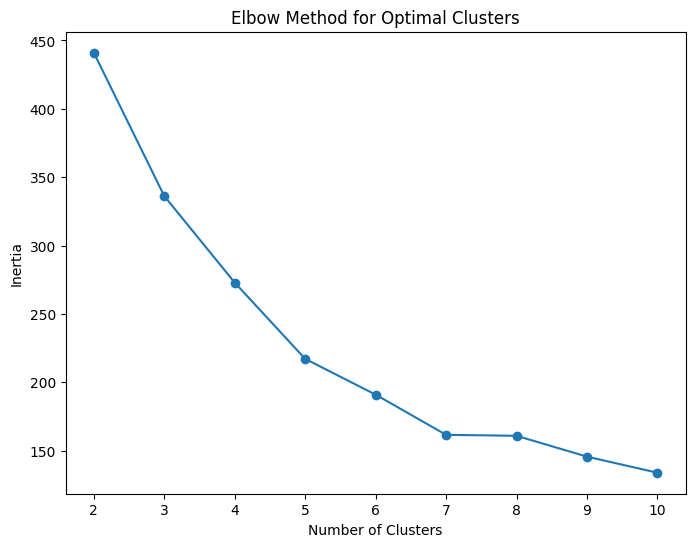

In [9]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [10]:
# Perform clustering with the optimal number of clusters
optimal_clusters = 4  # Replace with the number based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(scaled_data)

In [11]:
# Evaluate clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_features["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.0259136043470107


# **Visualize Clusters**

In [12]:
from sklearn.decomposition import PCA
import seaborn as sns

In [13]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [14]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2"])
plot_data["Cluster"] = customer_features["Cluster"]

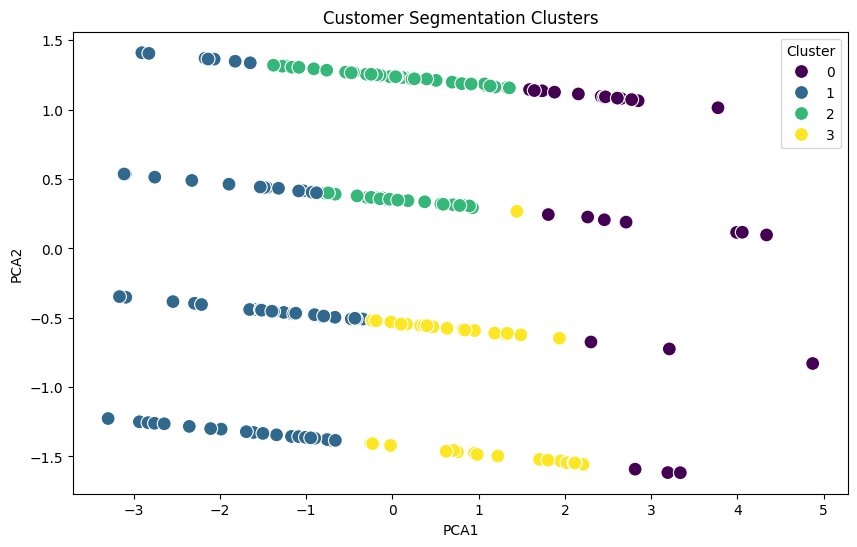

In [15]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=100)
plt.title("Customer Segmentation Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

In [16]:
customer_features.to_csv("FirstName_LastName_Clustering.csv", index=False)
print("Cluster results saved to CSV.")

Cluster results saved to CSV.
